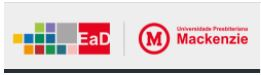

ASSOCIAÇÃO E REGRESSÃO

Profa. Ma.Vanusa da Silva Santana 

TURMA 01A – MATRÍCULA 92104843
Fernando Antonio Carvalho Pessoa

Tarefa da trilha 2: praticar a aplicação do algoritmo Apriori com agrupamento de variáveis contínuas

#Dataset


## Descrição
O conjunto de dados Iris foi usado em R.A. O artigo clássico de Fisher de 1936, The Use of Multiple Measurements in Taxonomic Problems
Inclui três espécies de íris com 50 amostras cada, bem como algumas propriedades sobre cada flor. Uma espécie de flor é linearmente separável das outras duas, mas as outras duas não são linearmente separáveis ​​uma da outra.

## Detalhes do dataset

O dataset é um arquivo CSV, contento 150 linhas

## Atributos


As colunas neste conjunto de dados são:

Identificação

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Espécies

Largura da Sépala vs. Comprimento da Sépala

# Carga de Bibliotecas

In [1]:
!pip install mlxtend

In [2]:
## Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
# carregando dados para o Google Colab
from google.colab import files
uploaded = files.upload()

#carga da Iris original

In [5]:
# carregando o arquivo para o dataframe iris
iris = pd.read_csv('/content/Iris.csv')

In [6]:
iris.shape

(150, 6)

In [7]:
# mostrando os dados no dataframe iris
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()
del iris['Id']
del iris['Species']
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# verificando os tipos do dados
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [10]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [11]:
iris.duplicated().sum()

3

# Cópia da Iris para discretização

In [12]:
irisCopia=iris.copy()

In [13]:
irisCopia.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Pré Processamento da Base

## Discretização de dados

In [14]:
#calculo da qt de classes com sturges
sturges = int(1 + (3.322 *(math.log(iris.shape[0],10))))
#classe 1 SepalLengthCm
int_SepalLengthCm = pd.cut(iris["SepalLengthCm"],sturges)
print(iris["SepalLengthCm"].min(),iris["SepalLengthCm"].max(),int_SepalLengthCm)
iris['int_SepalLengthCm']=pd.cut(iris["SepalLengthCm"],sturges,labels=['SepaLen1', 'SepaLen2', 'SepaLen3', 'SepaLen4', 'SepaLen5', 'SepaLen6', 'SepaLen7','SepaLen8'])
#classes fas SepalWidthCm
int_SepalWidthCm = pd.cut(iris["SepalWidthCm"],sturges)
print(iris["SepalWidthCm"].min(),iris["SepalWidthCm"].max(),int_SepalWidthCm)
iris['int_SepalWidthCm']=pd.cut(iris["SepalWidthCm"],sturges,labels=['SepaWid1', 'SepaWid2', 'SepaWid3', 'SepaWid4', 'SepaWid5', 'SepaWid6', 'SepaWid7','SepaWid8'])
#classes fas PetalLengthCm
int_PetalLengthCm = pd.cut(iris["PetalLengthCm"],sturges)
print(iris["PetalLengthCm"].min(),iris["PetalLengthCm"].max(),int_PetalLengthCm)
iris['int_PetalLengthCm']=pd.cut(iris["PetalLengthCm"],sturges,labels=['PetaLen1', 'PetaLen2', 'PetaLen3', 'PetaLen4', 'PetaLen5', 'PetaLen6', 'PetaLen7','PetaLen8'])
#classes fas PetalWidthCm
int_PetalWidthCm = pd.cut(iris["PetalWidthCm"],sturges)
print(iris["PetalWidthCm"].min(),iris["PetalWidthCm"].max(),int_PetalWidthCm)
iris['int_PetalWidthCm']=pd.cut(iris["PetalWidthCm"],sturges,labels=['PetaWid1', 'PetaWid2', 'PetaWid3', 'PetaWid4', 'PetaWid5', 'PetaWid6', 'PetaWid7','PetaWid8'])

4.3 7.9 0        (4.75, 5.2]
1        (4.75, 5.2]
2      (4.296, 4.75]
3      (4.296, 4.75]
4        (4.75, 5.2]
           ...      
145      (6.55, 7.0]
146      (6.1, 6.55]
147      (6.1, 6.55]
148      (6.1, 6.55]
149      (5.65, 6.1]
Name: SepalLengthCm, Length: 150, dtype: category
Categories (8, interval[float64]): [(4.296, 4.75] < (4.75, 5.2] < (5.2, 5.65] < (5.65, 6.1] <
                                    (6.1, 6.55] < (6.55, 7.0] < (7.0, 7.45] < (7.45, 7.9]]
2.0 4.4 0      (3.2, 3.5]
1      (2.9, 3.2]
2      (2.9, 3.2]
3      (2.9, 3.2]
4      (3.5, 3.8]
          ...    
145    (2.9, 3.2]
146    (2.3, 2.6]
147    (2.9, 3.2]
148    (3.2, 3.5]
149    (2.9, 3.2]
Name: SepalWidthCm, Length: 150, dtype: category
Categories (8, interval[float64]): [(1.998, 2.3] < (2.3, 2.6] < (2.6, 2.9] < (2.9, 3.2] < (3.2, 3.5] <
                                    (3.5, 3.8] < (3.8, 4.1] < (4.1, 4.4]]
1.0 6.9 0      (0.994, 1.738]
1      (0.994, 1.738]
2      (0.994, 1.738]
3      (0.994, 1.738

In [15]:
iris.shape

(150, 8)

In [16]:
# mostrando os dados no dataframe iris
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,int_SepalLengthCm,int_SepalWidthCm,int_PetalLengthCm,int_PetalWidthCm
0,5.1,3.5,1.4,0.2,SepaLen2,SepaWid5,PetaLen1,PetaWid1
1,4.9,3.0,1.4,0.2,SepaLen2,SepaWid4,PetaLen1,PetaWid1
2,4.7,3.2,1.3,0.2,SepaLen1,SepaWid4,PetaLen1,PetaWid1
3,4.6,3.1,1.5,0.2,SepaLen1,SepaWid4,PetaLen1,PetaWid1
4,5.0,3.6,1.4,0.2,SepaLen2,SepaWid6,PetaLen1,PetaWid1
5,5.4,3.9,1.7,0.4,SepaLen3,SepaWid7,PetaLen1,PetaWid1
6,4.6,3.4,1.4,0.3,SepaLen1,SepaWid5,PetaLen1,PetaWid1
7,5.0,3.4,1.5,0.2,SepaLen2,SepaWid5,PetaLen1,PetaWid1
8,4.4,2.9,1.4,0.2,SepaLen1,SepaWid3,PetaLen1,PetaWid1
9,4.9,3.1,1.5,0.1,SepaLen2,SepaWid4,PetaLen1,PetaWid1


# Eliminando colunas desnecessárias

In [17]:
iris.info()
del iris['SepalLengthCm']
del iris['SepalWidthCm']
del iris['PetalLengthCm']
del iris['PetalWidthCm']
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   SepalLengthCm      150 non-null    float64 
 1   SepalWidthCm       150 non-null    float64 
 2   PetalLengthCm      150 non-null    float64 
 3   PetalWidthCm       150 non-null    float64 
 4   int_SepalLengthCm  150 non-null    category
 5   int_SepalWidthCm   150 non-null    category
 6   int_PetalLengthCm  150 non-null    category
 7   int_PetalWidthCm   150 non-null    category
dtypes: category(4), float64(4)
memory usage: 6.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   int_SepalLengthCm  150 non-null    category
 1   int_SepalWidthCm   150 non-null    category
 2   int_PetalLengthCm  150 non-null    category
 3  

In [42]:
iris.head(10),irisCopia.head(10)

(  int_SepalLengthCm int_SepalWidthCm int_PetalLengthCm int_PetalWidthCm
 0          SepaLen2         SepaWid5          PetaLen1         PetaWid1
 1          SepaLen2         SepaWid4          PetaLen1         PetaWid1
 2          SepaLen1         SepaWid4          PetaLen1         PetaWid1
 3          SepaLen1         SepaWid4          PetaLen1         PetaWid1
 4          SepaLen2         SepaWid6          PetaLen1         PetaWid1
 5          SepaLen3         SepaWid7          PetaLen1         PetaWid1
 6          SepaLen1         SepaWid5          PetaLen1         PetaWid1
 7          SepaLen2         SepaWid5          PetaLen1         PetaWid1
 8          SepaLen1         SepaWid3          PetaLen1         PetaWid1
 9          SepaLen2         SepaWid4          PetaLen1         PetaWid1,
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0            5.1           3.5            1.4           0.2
 1            4.9           3.0            1.4           0.2
 2           

# 1.	Aplicando Algoritmo Apriori

##Transformando em Lista

## Original

In [33]:
listaIrisGeral = []
for index, row in irisCopia.iterrows():
  listaIris = list(row.values.tolist())
  listaIrisGeral.append(listaIris)
print((listaIrisGeral))

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

In [34]:
te = TransactionEncoder()
te_iris = te.fit(listaIrisGeral).transform(listaIrisGeral)
te_iris

array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [35]:
df_iris = pd.DataFrame(te_iris, columns=te.columns_)
df_iris.head(10)

,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,

In [76]:
freqIrisOrig = apriori(df_iris, min_support= 0.1, use_colnames=True)
freqIrisOrig.sort_values(by=['support'], ascending= False)

,support,itemsets
0,0.186667,(0.2)
4,0.180000,(3.0)
3,0.173333,(1.5)
1,0.133333,(1.3)
2,0.133333,(1.4)
5,0.113333,(5.1)


In [83]:
regras = association_rules(freqIrisOrig, metric='confidence', min_threshold=0.1) 
regras.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


## Discretizado

In [44]:
listaIrisDGeral = []
for index, row in iris.iterrows():
  listaIrisD = list(row.values.tolist())
  listaIrisDGeral.append(listaIrisD)
print((listaIrisDGeral))


[['SepaLen2', 'SepaWid5', 'PetaLen1', 'PetaWid1'], ['SepaLen2', 'SepaWid4', 'PetaLen1', 'PetaWid1'], ['SepaLen1', 'SepaWid4', 'PetaLen1', 'PetaWid1'], ['SepaLen1', 'SepaWid4', 'PetaLen1', 'PetaWid1'], ['SepaLen2', 'SepaWid6', 'PetaLen1', 'PetaWid1'], ['SepaLen3', 'SepaWid7', 'PetaLen1', 'PetaWid1'], ['SepaLen1', 'SepaWid5', 'PetaLen1', 'PetaWid1'], ['SepaLen2', 'SepaWid5', 'PetaLen1', 'PetaWid1'], ['SepaLen1', 'SepaWid3', 'PetaLen1', 'PetaWid1'], ['SepaLen2', 'SepaWid4', 'PetaLen1', 'PetaWid1'], ['SepaLen3', 'SepaWid6', 'PetaLen1', 'PetaWid1'], ['SepaLen2', 'SepaWid5', 'PetaLen1', 'PetaWid1'], ['SepaLen2', 'SepaWid4', 'PetaLen1', 'PetaWid1'], ['SepaLen1', 'SepaWid4', 'PetaLen1', 'PetaWid1'], ['SepaLen4', 'SepaWid7', 'PetaLen1', 'PetaWid1'], ['SepaLen4', 'SepaWid8', 'PetaLen1', 'PetaWid1'], ['SepaLen3', 'SepaWid7', 'PetaLen1', 'PetaWid1'], ['SepaLen2', 'SepaWid5', 'PetaLen1', 'PetaWid1'], ['SepaLen4', 'SepaWid6', 'PetaLen1', 'PetaWid1'], ['SepaLen2', 'SepaWid6', 'PetaLen1', 'PetaWid1'],

In [45]:
teD = TransactionEncoder()
te_irisD = teD.fit(listaIrisDGeral).transform(listaIrisDGeral)
te_irisD

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [46]:
df_irisD = pd.DataFrame(te_irisD, columns=te.columns_)
df_irisD.head(10)

,PetaLen1,PetaLen2,PetaLen3,PetaLen4,PetaLen5,PetaLen6,PetaLen7,PetaLen8,PetaWid1,PetaWid2,PetaWid4,PetaWid5,PetaWid6,PetaWid7,PetaWid8,SepaLen1,SepaLen2,SepaLen3,SepaLen4,SepaLen5,SepaLen6,SepaLen7,SepaLen8,SepaWid1,SepaWid2,SepaWid3,SepaWid4,SepaWid5,SepaWid6,SepaWid7,SepaWid8
0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
5,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
6,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [73]:
freqIrisD = apriori(df_irisD, min_support= 0.1, use_colnames=True)
freqIrisD.sort_values(by=['support'], ascending= False)


,support,itemsets
16,0.340000,(SepaWid4)
0,0.320000,(PetaLen1)
4,0.320000,(PetaWid1)
18,0.306667,"(PetaWid1, PetaLen1)"
9,0.226667,(SepaLen2)
15,0.220000,(SepaWid3)
2,0.213333,(PetaLen6)
11,0.200000,(SepaLen4)
1,0.193333,(PetaLen5)
5,0.186667,(PetaWid4)


In [75]:
regrasD = association_rules(freqIrisD, metric='confidence', min_threshold=0.1) 
regrasD.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(PetaWid4),(PetaLen5),0.186667,0.193333,0.113333,0.607143,3.140394,0.077244,2.053333
8,(PetaLen5),(PetaWid4),0.193333,0.186667,0.113333,0.586207,3.140394,0.077244,1.965556
24,"(SepaWid4, PetaLen1)",(PetaWid1),0.106667,0.320000,0.106667,1.000000,3.125000,0.072533,inf
26,(PetaLen1),"(SepaWid4, PetaWid1)",0.320000,0.106667,0.106667,0.333333,3.125000,0.072533,1.340000
25,(PetaWid1),"(SepaWid4, PetaLen1)",0.320000,0.106667,0.106667,0.333333,3.125000,0.072533,1.340000
23,"(SepaWid4, PetaWid1)",(PetaLen1),0.106667,0.320000,0.106667,1.000000,3.125000,0.072533,inf
0,(PetaWid1),(PetaLen1),0.320000,0.320000,0.306667,0.958333,2.994792,0.204267,16.320000
1,(PetaLen1),(PetaWid1),0.320000,0.320000,0.306667,0.958333,2.994792,0.204267,16.320000
17,"(SepaLen2, PetaLen1)",(PetaWid1),0.173333,0.320000,0.160000,0.923077,2.884615,0.104533,8.840000
16,"(SepaLen2, PetaWid1)",(PetaLen1),0.173333,0.320000,0.160000,0.923077,2.884615,0.104533,8.840000
